# 1 实验介绍
## 1.1 关于本实验
本实验通过介绍MindSpore的数据结构与数据类型，MindSpore搭建神经网络用到的基础模块，比如数据集加载，神经网络搭建，模型训练与评估等，让学员熟悉MindSpore的基础用法，掌握MindSpore开发的简单流程。
## 1.2 实验目的

理解MindSpore开发基本流程。


理解MindSpore基础模块的功能。


掌握MindSpore的简单操作。

## 1.3 背景知识
神经网络知识，感知机，多层感知机，前向传播，反向传播，激活函数，损失函数，优化器，评估方法。
## 1.4 实验设计
1.张量和数据类型
2.数据集加载
3.全连接网络搭建
4.模型训练
5.模型评估
# 2 实验过程
## 2.1 张量和数据类型
张量（Tensor）是MindSpore网络运算中的基本数据结构。张量中的数据类型可参考dtype。
不同维度的张量分别表示不同的数据，0维张量表示标量，1维张量表示向量，2维张量表示矩阵，3维张量可以表示彩色图像的RGB三通道等等。

MindSpore张量支持不同的数据类型，包含int8、int16、int32、int64、uint8、uint16、uint32、uint64、float16、float32、float64、bool_，与NumPy的数据类型一一对应。
在MindSpore的运算处理流程中，Python中的int数会被转换为定义的int64类型，float数会被转换为定义的float32类型。
### 步骤 1	指定MindSpore数据类型
导入MindSpore，设置Jupyter notebook的cell同时输出多行。


In [3]:
# 导入MindSpore
import mindspore
from mindspore import dtype 
from mindspore import Tensor

# cell同时输出多行
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 指定数据类型
a = 1
type(a)
b = Tensor(a, dtype.float64) 
b.dtype 

int

mindspore.float64

### 步骤 2	张量构造
构造张量时，支持传入Tensor、float、int、bool、tuple、list和NumPy.array类型，其中tuple和list里只能存放float、int、bool类型数据。

Tensor初始化时，可指定dtype。如果没有指定dtype，初始值int、float、bool分别生成数据类型为mindspore.int32、mindspore.float32、mindspore.bool_的0维Tensor， 初始值tuple和list生成的1维Tensor数据类型与tuple和list里存放的数据类型相对应，如果包含多种不同类型的数据，则按照优先级：bool < int < float，选择相对优先级最高类型所对应的mindspore数据类型。 如果初始值是Tensor，则生成的Tensor数据类型与其一致；如果初始值是NumPy.array，则生成的Tensor数据类型与之对应。

用数组创建张量


In [5]:
import numpy as np
from mindspore import Tensor

# 用数组创建张量
x = Tensor(np.array([[1, 2], [3, 4]]), dtype.int32)
x

Tensor(shape=[2, 2], dtype=Int32, value=
[[1, 2],
 [3, 4]])

用数值创建张量

In [6]:
# 用数值创建张量
y = Tensor(1.0, dtype.int32)
z = Tensor(2, dtype.int32)
y
z

Tensor(shape=[], dtype=Int32, value= 1)

Tensor(shape=[], dtype=Int32, value= 2)

用Bool创建张量

In [7]:
# 用Bool创建张量
m = Tensor(True, dtype.bool_)
m

Tensor(shape=[], dtype=Bool, value= True)

用tuple创建张量

In [8]:
# 用tuple创建张量
n = Tensor((1, 2, 3), dtype.int16)
n

Tensor(shape=[3], dtype=Int16, value= [1, 2, 3])

用list创建张量

In [9]:
# 用list创建张量
p = Tensor([4.0, 5.0, 6.0], dtype.float64)
p

Tensor(shape=[3], dtype=Float64, value= [4.00000000e+000, 5.00000000e+000, 6.00000000e+000])

用常量创建张量

In [10]:
# 用常量创建张量
q = Tensor(1, dtype.float64)
q

Tensor(shape=[], dtype=Float64, value= 1)

### 步骤 3	张量的属性
张量的属性包括形状（shape）和数据类型（dtype）。
* 形状：Tensor的shape，是一个tuple。
* 数据类型：Tensor的dtype，是MindSpore的一个数据类型。


In [11]:
x = Tensor(np.array([[1, 2], [3, 4]]), dtype.int32)
x_shape = x.shape  # 形状
x_dtype = x.dtype  # 数据类型

x_shape
x_dtype

(2, 2)

mindspore.int32

In [12]:
x = Tensor(np.array([[1, 2], [3, 4]]), dtype.int32)

x.shape # 形状
x.dtype # 数据类型
x.ndim  # 维度
x.size  # 大小

(2, 2)

mindspore.int32

2

4

### 步骤 4	张量的方法

asnumpy()：将Tensor转换为NumPy的array。


In [13]:
y = Tensor(np.array([[True, True], [False, False]]), dtype.bool_)

# 将Tensor数据类型转换成NumPy
y_array = y.asnumpy()

y
y_array

Tensor(shape=[2, 2], dtype=Bool, value=
[[ True,  True],
 [False, False]])

array([[ True,  True],
       [False, False]])

## 2.2 数据集加载
MindSpore.dataset提供API来加载和处理各种常见的数据集，如MNIST, CIFAR-10, CIFAR-100, VOC, ImageNet, CelebA等。
### 步骤 1	加载MNIST数据集
mindspore.dataset.MnistDataset


<Figure size 800x800 with 0 Axes>

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

<Axes: >

(-0.5, 27.5, 27.5, -0.5)

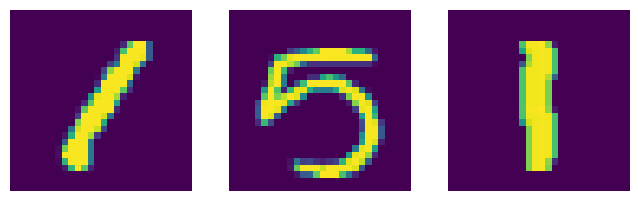

In [14]:
import os
import mindspore.dataset as ds
import matplotlib.pyplot as plt

dataset_dir = "./data/train"  # 数据集路径

# 从mnist dataset读取3张图片
mnist_dataset = ds.MnistDataset(dataset_dir=dataset_dir, num_samples=3)

# 设置图像大小
plt.figure(figsize=(8,8))
i = 1

# 打印3张子图
for dic in mnist_dataset.create_dict_iterator(output_numpy=True):
    plt.subplot(3,3,i)
    plt.imshow(dic['image'][:,:,0])
    plt.axis('off')
    i +=1

plt.show()

MindSpore还支持加载多种数据存储格式下的数据集，用户可以直接使用mindspore.dataset中对应的类加载磁盘中的数据文件。
### 步骤 2	加载NumPy数据集
mindspore.dataset.NumpySlicesDataset


In [15]:
import mindspore.dataset as ds

data = ds.NumpySlicesDataset([1, 2, 3], column_names=["col_1"])
for x in data.create_dict_iterator():
    print(x)

{'col_1': Tensor(shape=[], dtype=Int32, value= 2)}
{'col_1': Tensor(shape=[], dtype=Int32, value= 3)}
{'col_1': Tensor(shape=[], dtype=Int32, value= 1)}


## 2.3 全连接网络搭建
### 步骤 1	全连接神经网络
全连接层
mindspore.nn.Dense
* in_channels：输入通道
* out_channels：输出通道
* weight_init：权重初始化，Default 'normal'.


In [16]:
import mindspore.nn as nn
from mindspore import Tensor

# 构造输入张量
input = Tensor(np.array([[1, 1, 1], [2, 2, 2]]), mindspore.float32)
print(input)

# 构造全连接网络，输入通道为3，输出通道为3
net = nn.Dense(in_channels=3, out_channels=3, weight_init=1)
output = net(input)
print(output)

[[1. 1. 1.]
 [2. 2. 2.]]
[[3. 3. 3.]
 [6. 6. 6.]]


### 步骤 2	激活函数
矫正线性单元激活函数

mindspore.nn.ReLU


In [17]:
input_x = Tensor(np.array([-1, 2, -3, 2, -1]), mindspore.float16)

relu = nn.ReLU()
output = relu(input_x)
print(output)

[0. 2. 0. 2. 0.]


### 步骤 3	搭建模型
所有神经网络的基类

mindspore.nn.Cell


In [18]:
import mindspore.nn as nn

class MyCell(nn.Cell):
    
    # 定义算子
    def __init__(self, ):
        super(MyCell, self).__init__()
        
        # 全连接层
        self.fc = nn.Dense()

        # 激活函数
        self.relu = nn.ReLU()

    # 建构网络
    def construct(self, x):
        x = self.fc(x)
        x = self.relu(x)
        return x

## 2.4 模型训练与评估
### 步骤 1	损失函数
交叉熵损失函数，用于分类模型。当标签数据不是one-hot编码形式时，需要输入参数sparse为True。

mindspore.nn.SoftmaxCrossEntropyWithLogits


In [19]:
import mindspore.nn as nn

# 交叉熵损失函数
loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True)

np.random.seed(0)
logits = Tensor(np.random.randint(0, 9, [1, 10]), mindspore.float32)
print(logits)

labels_np = np.ones([1,]).astype(np.int32)
labels = Tensor(labels_np)
print(labels)

output = loss(logits, labels)
print(output)

[[5. 0. 3. 3. 7. 3. 5. 2. 4. 7.]]
[1]
[7.868383]


### 步骤 2	优化器
深度学习优化算法大概常用的有SGD、Adam、Ftrl、lazyadam、Momentum、RMSprop、Lars、Proximal_ada_grad和lamb这几种。

动量优化器

mindspore.nn.Momentum


In [20]:
# optim = nn.Momentum(params, learning_rate=0.1, momentum=0.9, weight_decay=0.0) # params是传入的参数

### 步骤 3	模型编译
mindspore.Model
* network：神经网络
* loss_fn：损失函数
* optimizer：优化器
* metrics：评估指标


In [21]:
from mindspore import Model

# 定义神经网络
net = nn.Dense(in_channels=3, out_channels=3, weight_init=1)
# 定义损失函数
loss = nn.SoftmaxCrossEntropyWithLogits()
# 定义优化器
optim = nn.Momentum(params=net.trainable_params(), learning_rate=0.1, momentum=0.9)
# 模型编译
model = Model(network = net, loss_fn=loss, optimizer=optim, metrics=None)

### 步骤 4	模型训练
model.train
* epoch：训练次数
* train_dataset ：训练集


In [22]:
# model.train(epoch=10, train_dataset=train_dataset)  # train_dataset 是传入参数

### 步骤 5	模型评估
model.eval
* valid_dataset：测试集


In [23]:
# model.eval(valid_dataset=test_dataset)  # test_dataset 是传入参数

# 3 实验总结
本实验介绍了MindSpore的数据结构与类型，以及MindSpore搭建神经网络用到的基础模块，让学员学会如何加载数据集，搭建神经网络，训练和评估模型等，从易到难，由浅入深，让学员熟悉MindSpore的基础用法，掌握MindSpore开发的简单流程。
